# Hot Jupiter: Plot Results

## Plot Style

In [1]:
import copy

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

PLOT_STYLES = {
    "mnras": {
        "text.usetex": True,
        "font.family": "serif",
        "font.size": 8,
        "axes.labelsize": 8,
        "axes.titlesize": 8,
        "axes.linewidth": 0.8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "xtick.major.size": 4,
        "ytick.major.size": 4,
        "xtick.minor.size": 2,
        "ytick.minor.size": 2,
        "xtick.major.width": 0.8,
        "ytick.major.width": 0.8,
        "legend.fontsize": 8,
        "legend.frameon": False,
        "lines.linewidth": 1.0,
        "lines.markersize": 4,
        "savefig.dpi": 300,
        "savefig.bbox": "tight",
        "text.latex.preamble": r"\usepackage{newtxtext,newtxmath}",
    }
}

def apply_plot_style(style="mnras", disable_tex=False):
    rc = copy.deepcopy(PLOT_STYLES[style])
    if disable_tex:
        rc["text.usetex"] = False
        rc.pop("text.latex.preamble", None)
    try:
        plt.rcParams.update(rc)
    except Exception:
        fallback = copy.deepcopy(rc)
        fallback["text.usetex"] = False
        fallback.pop("text.latex.preamble", None)
        plt.rcParams.update(fallback)

def hide_ticks(ax, hide_x=False, hide_y=False):
    if hide_x:
        ax.set_xlabel("")
        ax.tick_params(labelbottom=False)
    if hide_y:
        ax.set_ylabel("")
        ax.tick_params(labelleft=False)

apply_plot_style(disable_tex=True)
%matplotlib inline

## Load Results

In [2]:
from hjmodel import HJModel

EXPERIMENT = "47TUC_EXAMPLE"
model = HJModel(name=EXPERIMENT)

results = model.results

## Outcome Probabilities

In [3]:
print(f"Results for {EXPERIMENT} (aggregated)")
print("-" * 40)
for label, val in results.compute_outcome_probabilities().items():
    print(f"{label}: {val:.4f}")

for desc, r_range in [("0 < r < 0.5", (0, 0.5)), ("8 < r < 100", (8, 100))]:
    print(f"  {desc}:")
    sub_probs = results.compute_outcome_probabilities(r_range=r_range)
    for label, val in sub_probs.items():
        print(f"    {label}: {val:.4f}")

Results for EXAMPLE (aggregated)
----------------------------------------
NM: 0.3588
ION: 0.6240
TD: 0.0110
HJ: 0.0060
WJ: 0.0002
  0 < r < 0.5:
    NM: 0.0000
    ION: 0.9318
    TD: 0.0682
    HJ: 0.0000
    WJ: 0.0000
  8 < r < 100:
    NM: 0.8764
    ION: 0.1225
    TD: 0.0008
    HJ: 0.0004
    WJ: 0.0000


## Stopping Time

/Users/jameswirth/PycharmProjects/hot-jupiter/hjmodel/results.py:184: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


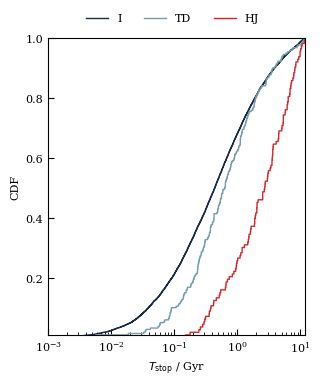

In [4]:
fig, ax = plt.subplots(figsize=(3.32, 3.85))
results.plot_stopping_cdf(ax)

fig.legend(
    ["I", "TD", "HJ"],
    loc="upper center",
    ncols=3,
    frameon=False,
    bbox_to_anchor=(0.5, 0.97),
)

plt.show()

## Semi-Major Axis

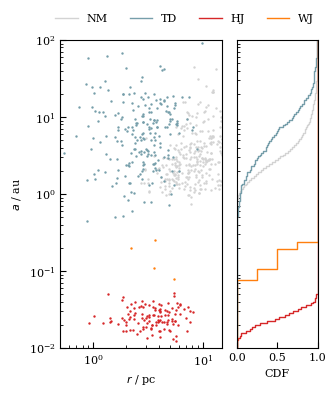

In [5]:
fig, axes = plt.subplots(
    1, 2, figsize=(3.32, 4), gridspec_kw={"width_ratios": [2, 1], "wspace": 0.12}
)

results.plot_sma_scatter(axes[0])
results.plot_sma_distribution(axes[1])

hide_ticks(axes[1], hide_y=True)

outcomes = ["NM", "TD", "HJ", "WJ"]
collections = axes[0].collections
legend_handles = [
    mlines.Line2D([], [], color=col.get_facecolor()[0], label=label)
    for col, label in zip(collections, outcomes)
]
fig.legend(
    handles=legend_handles,
    loc="upper center",
    ncols=4,
    frameon=False,
    bbox_to_anchor=(0.5, 0.97),
)

plt.show()